In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix ,precision_score ,recall_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("/content/diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
## Check the size
data.shape

(768, 9)

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
data.shape

(768, 9)

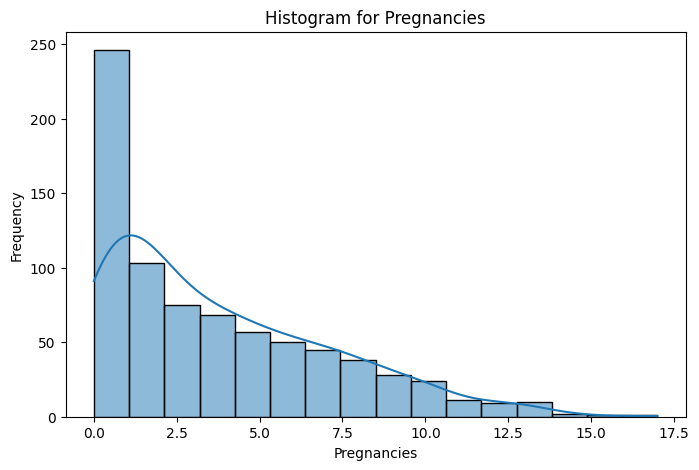

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Pregnancies'], kde=True)
plt.title('Histogram for Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

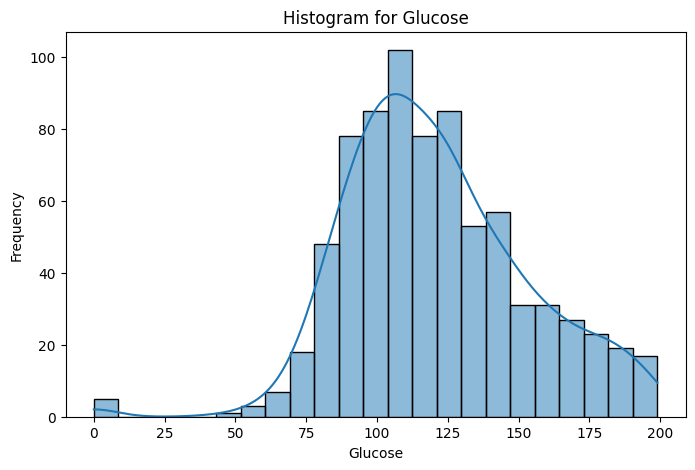

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Glucose'], kde=True)
plt.title('Histogram for Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

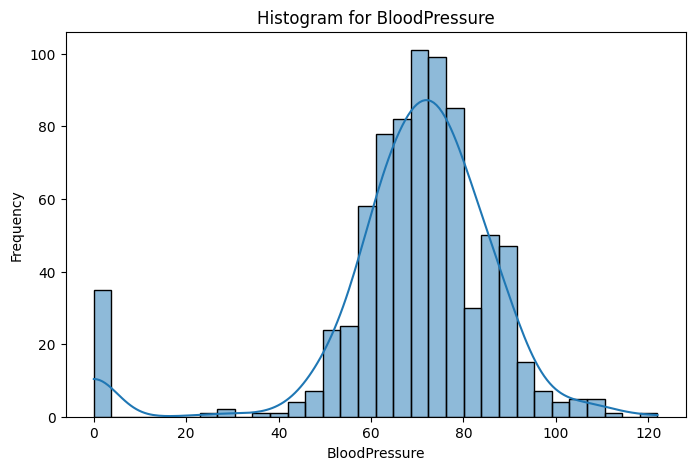

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['BloodPressure'], kde=True)
plt.title('Histogram for BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

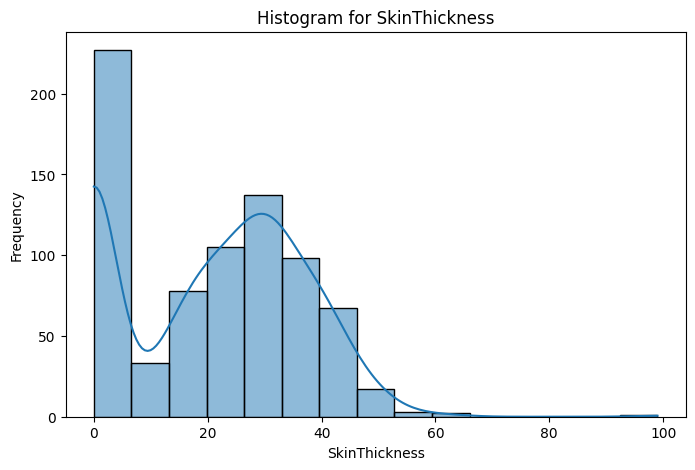

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['SkinThickness'], kde=True)
plt.title('Histogram for SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

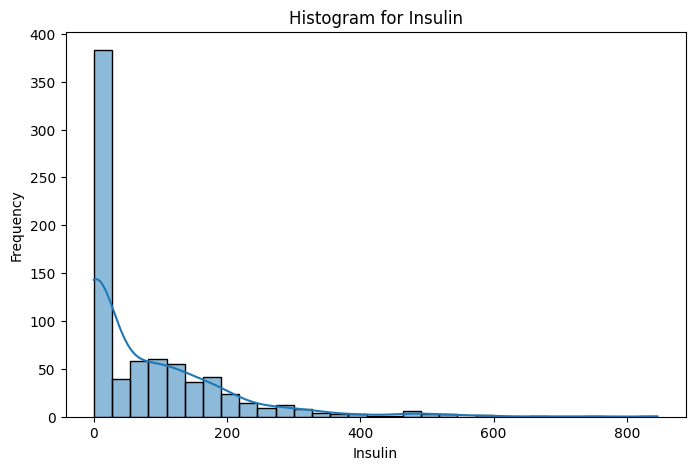

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Insulin'], kde=True)
plt.title('Histogram for Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

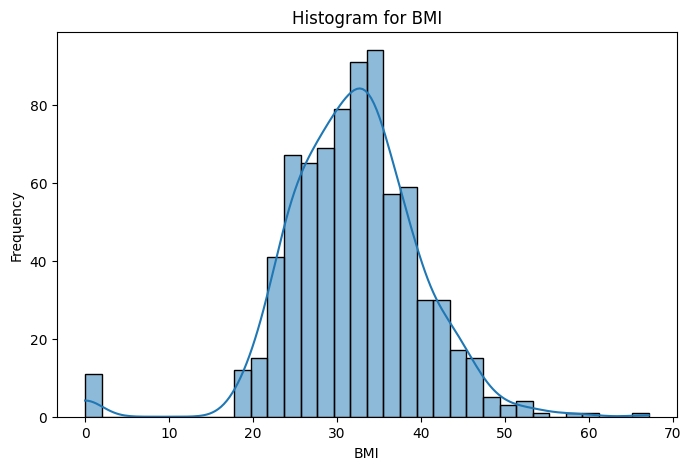

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['BMI'], kde=True)
plt.title('Histogram for BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

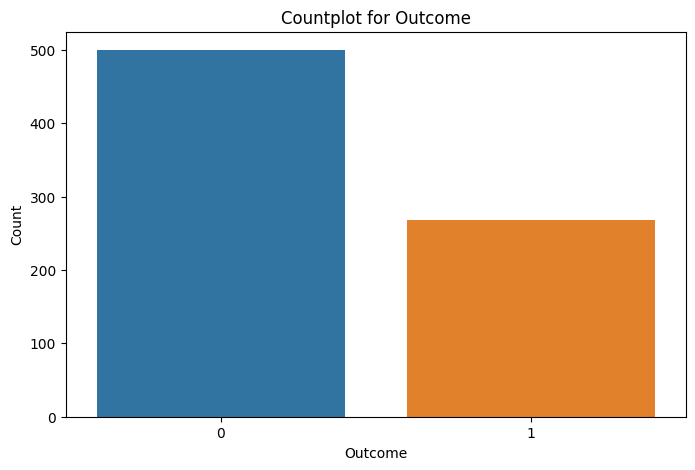

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=data)
plt.title('Countplot for Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

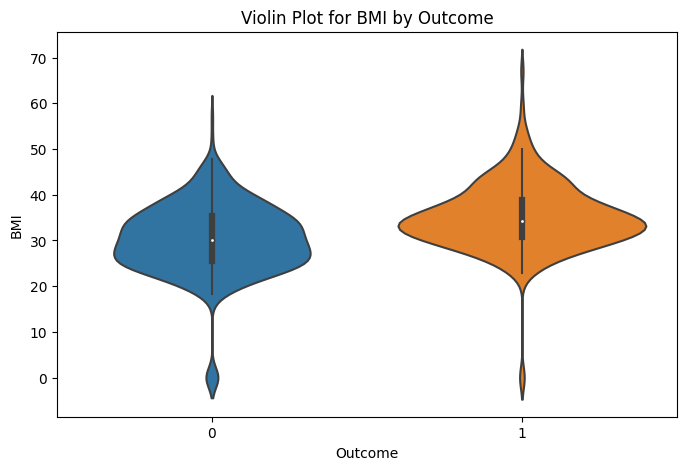

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Outcome', y='BMI', data=data)
plt.title('Violin Plot for BMI by Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

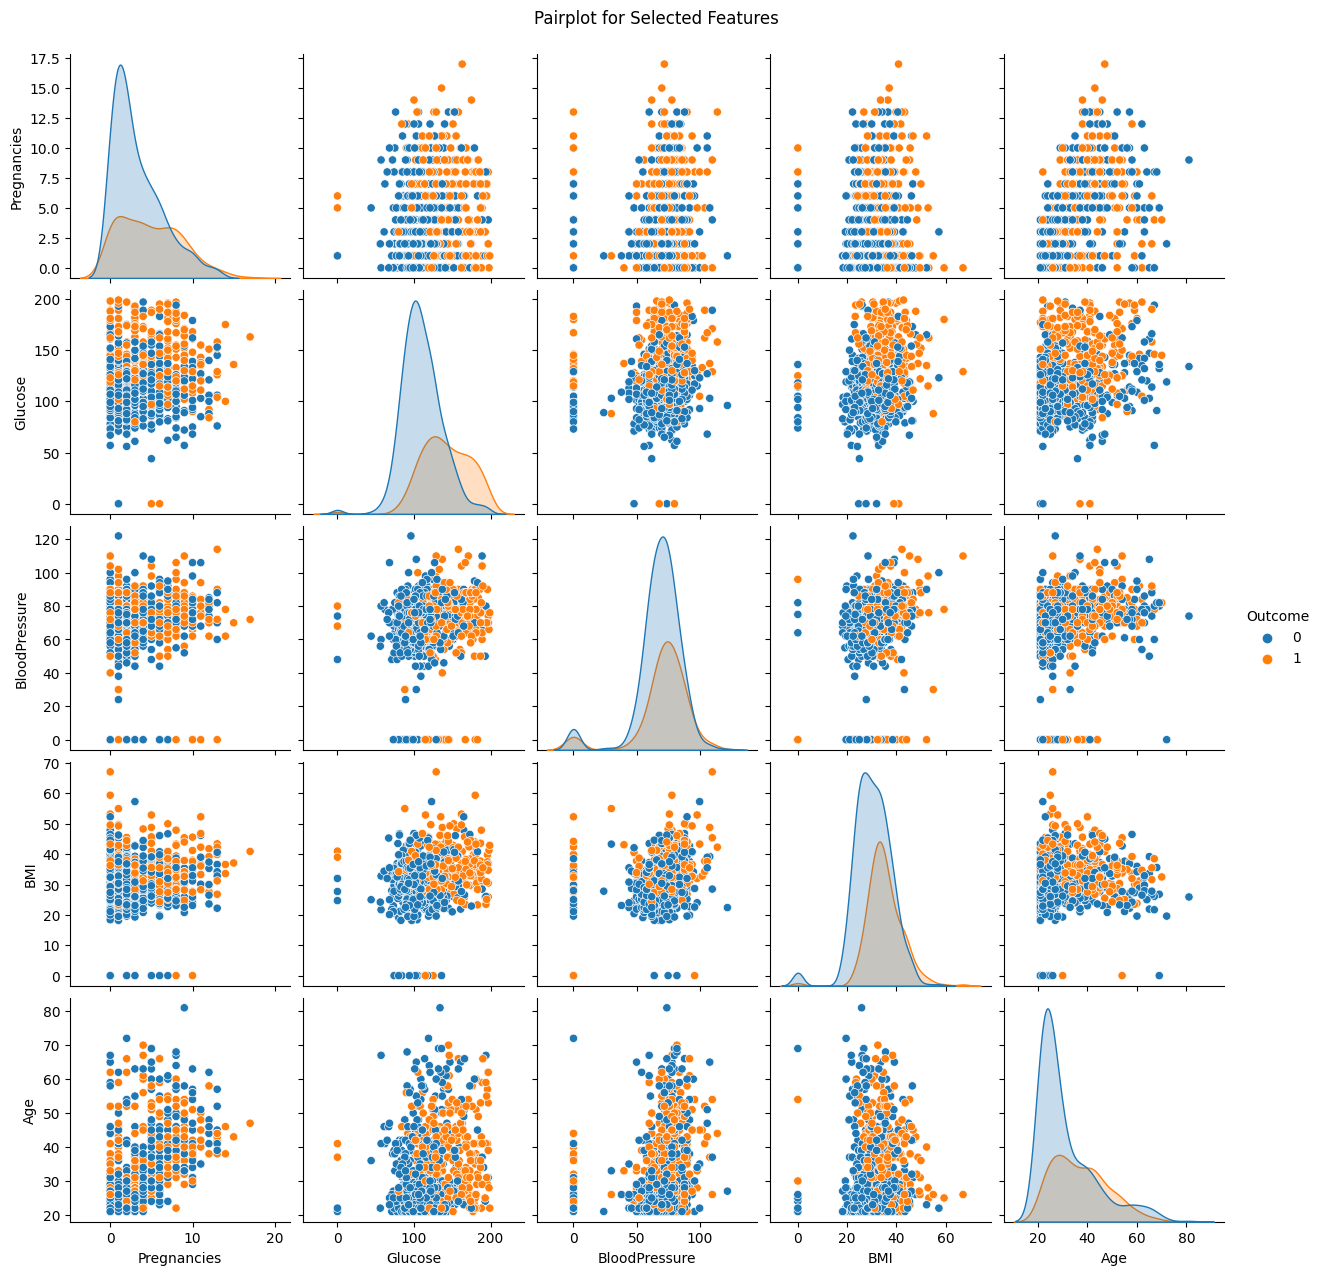

In [ ]:
sns.pairplot(data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']], hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot for Selected Features', y=1.02)
plt.show()

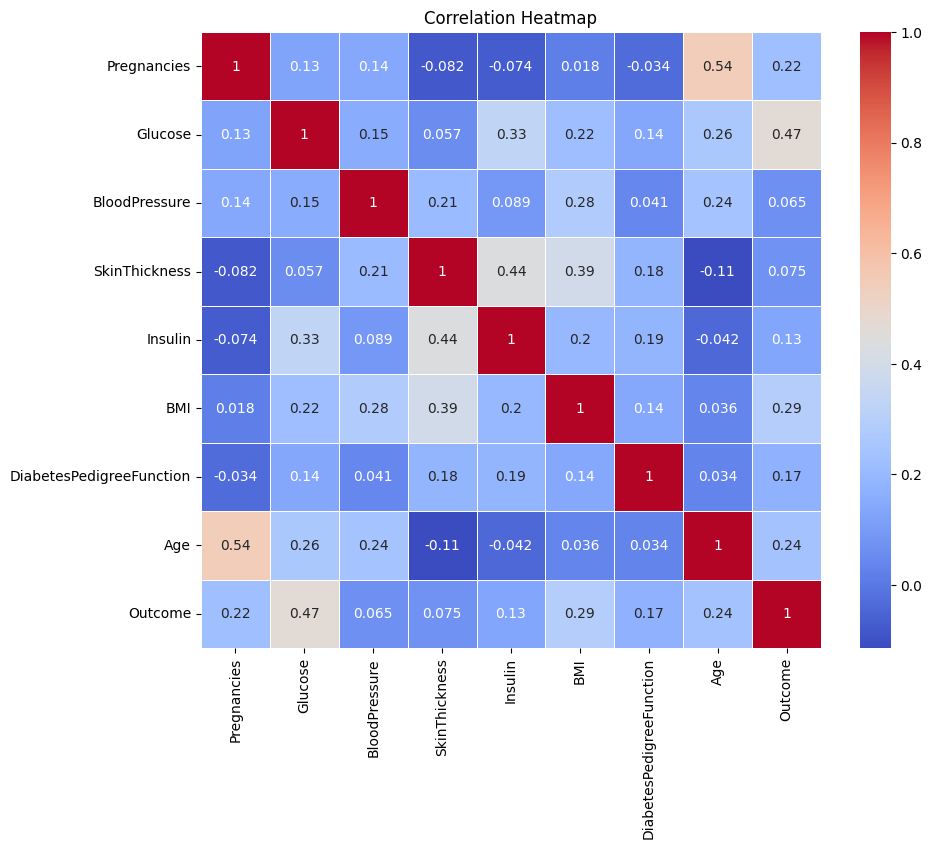

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
scaler = StandardScaler()

numeric = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

transformer = ColumnTransformer([("num",scaler, numeric)])
x = data.drop("Outcome" ,axis = 1)
y = data["Outcome"]

transform = transformer.fit_transform(x)

print("transform shape :",transform.shape)
print("y shape :",y.shape)

transform shape : (768, 8)
y shape : (768,)


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x_train ,x_test ,y_train ,y_test = train_test_split (transform ,y ,test_size = 0.2 ,random_state = 42)

In [ ]:
x_train.shape

(614, 8)

In [ ]:
x_test.shape

(154, 8)

In [ ]:
y_train.shape

(614,)

In [ ]:
y_test.shape

(154,)

In [ ]:
class_names = [0, 1]
print(class_names)

[0, 1]


In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
mnb = GradientBoostingClassifier()
mnb.fit(x_train, y_train)
train_accuracy = mnb.score(x_train, y_train)
test_accuracy = mnb.score(x_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
y_pred = mnb.predict(x_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)

Training Accuracy: 0.94
Test Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



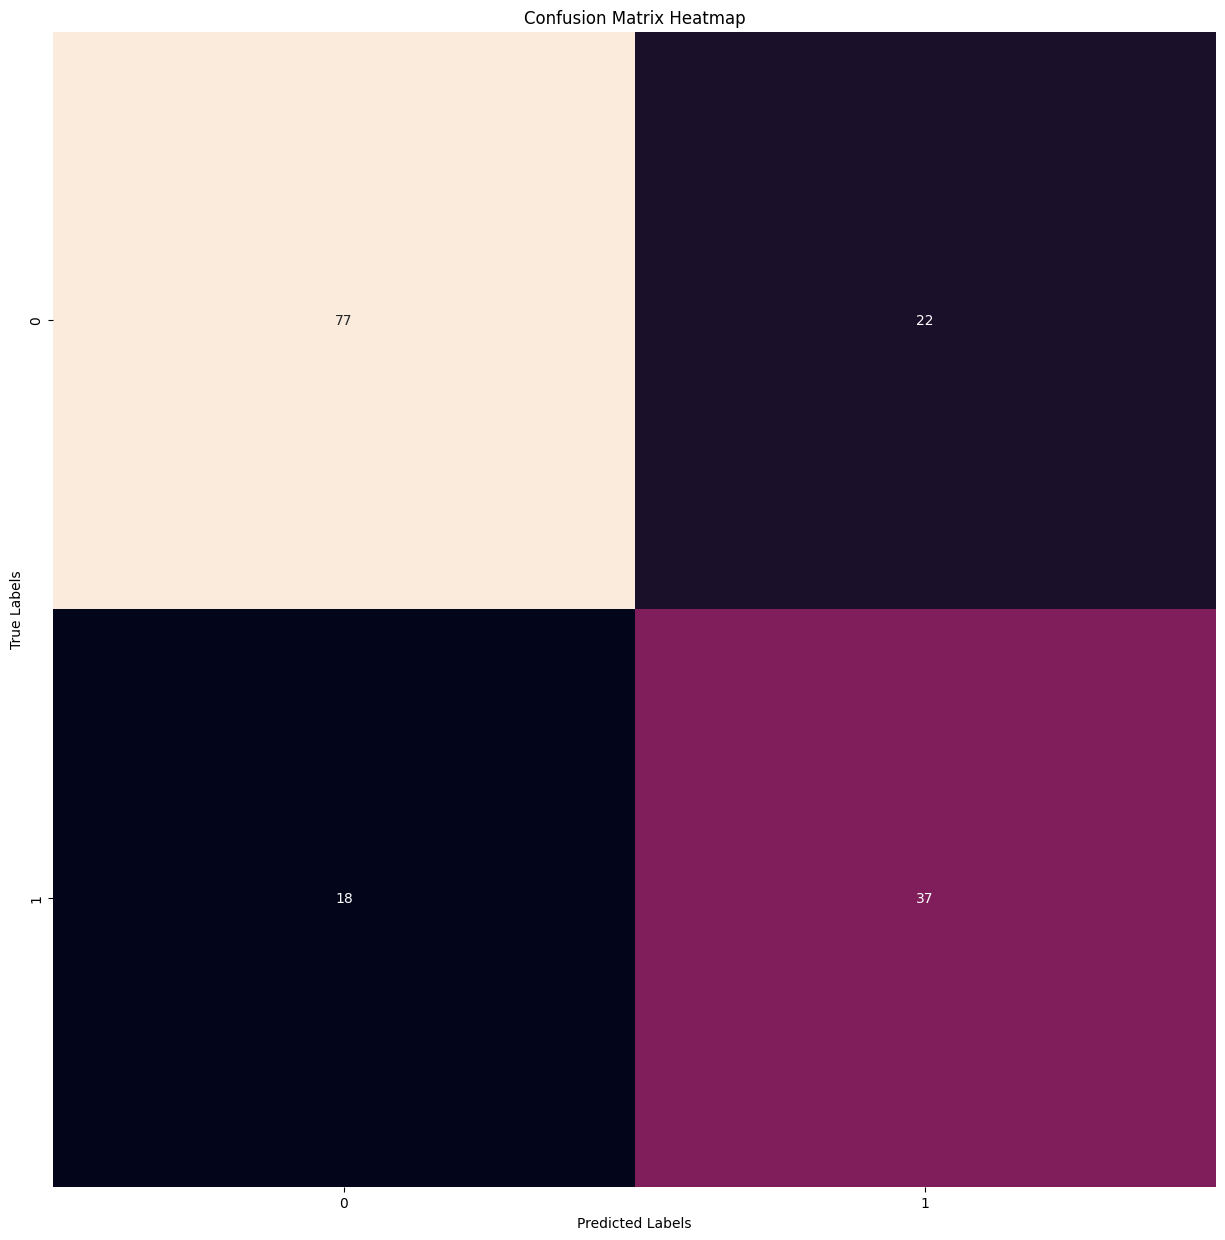

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(x_train ,y_train)
print("Model Score on Training data",model.score(x_train ,y_train))
print("Model Score on Testing data",model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.7703583061889251
Model Score on Testing data 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.67      0.65      0.66        57

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



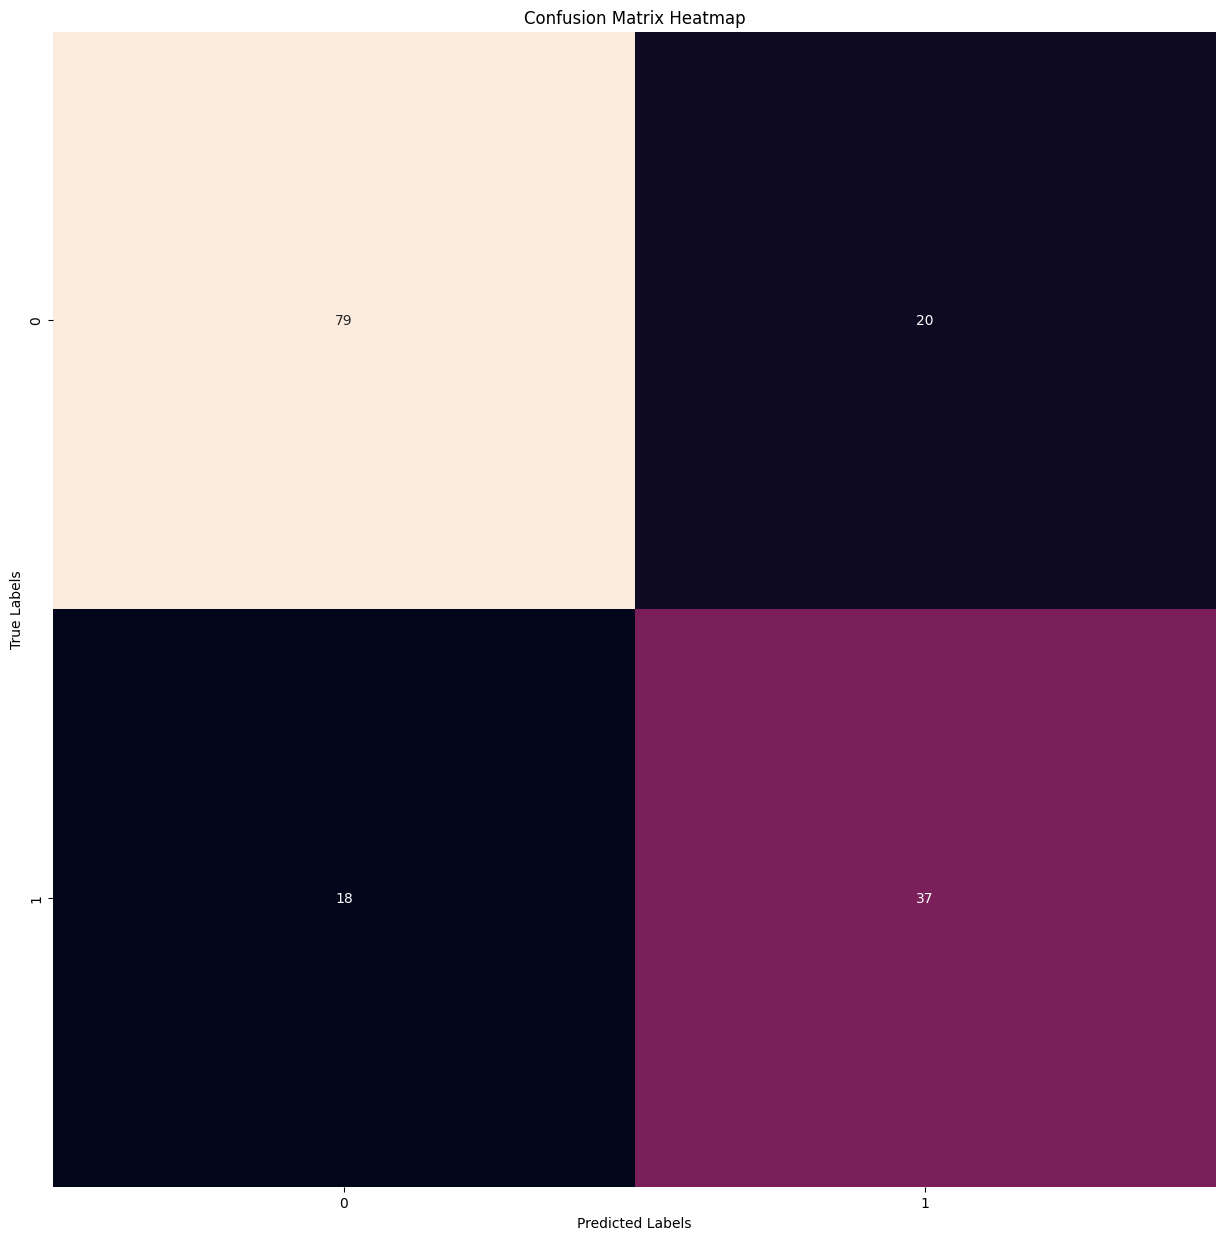

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
svm = LinearSVC()
svm.fit(x_train ,y_train)
print("Model Score on Training data",svm.score(x_train ,y_train))
print("Model Score on Testing data",svm.score(x_test ,y_test))
y_pred = svm.predict(x_test)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.7703583061889251
Model Score on Testing data 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.67      0.65      0.66        57

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


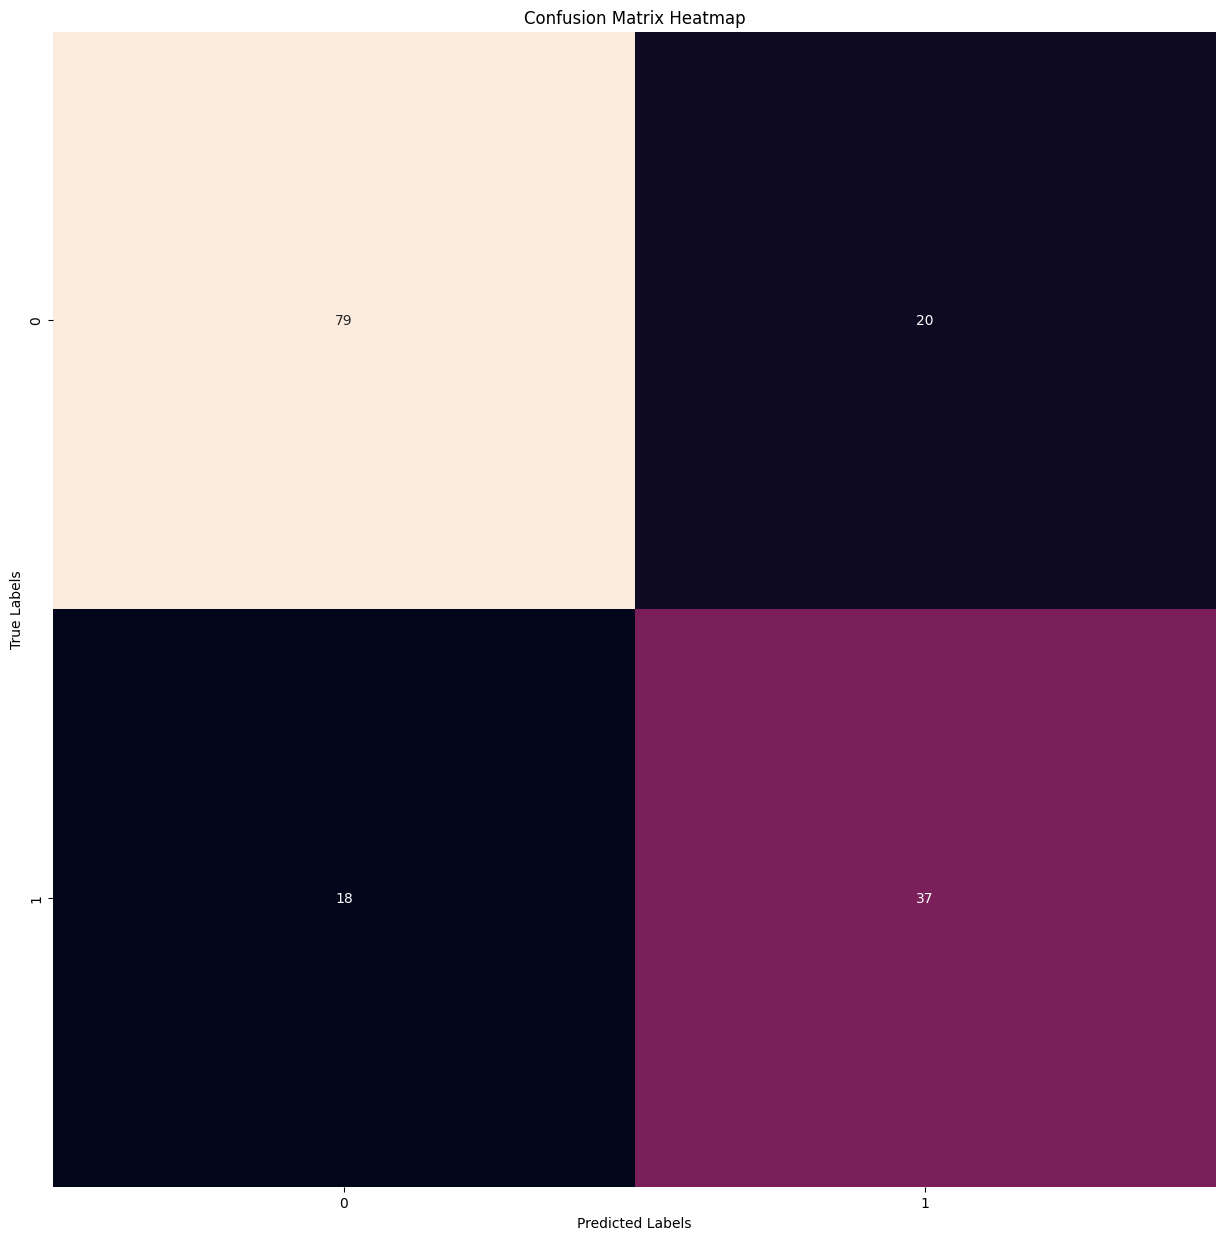

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test, y_test))

y_pred = random_forest.predict(x_test)
print(classification_report(y_pred ,y_test))

Random Forest - Train Score: 1.0
Random Forest - Test Score: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        98
           1       0.65      0.64      0.65        56

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



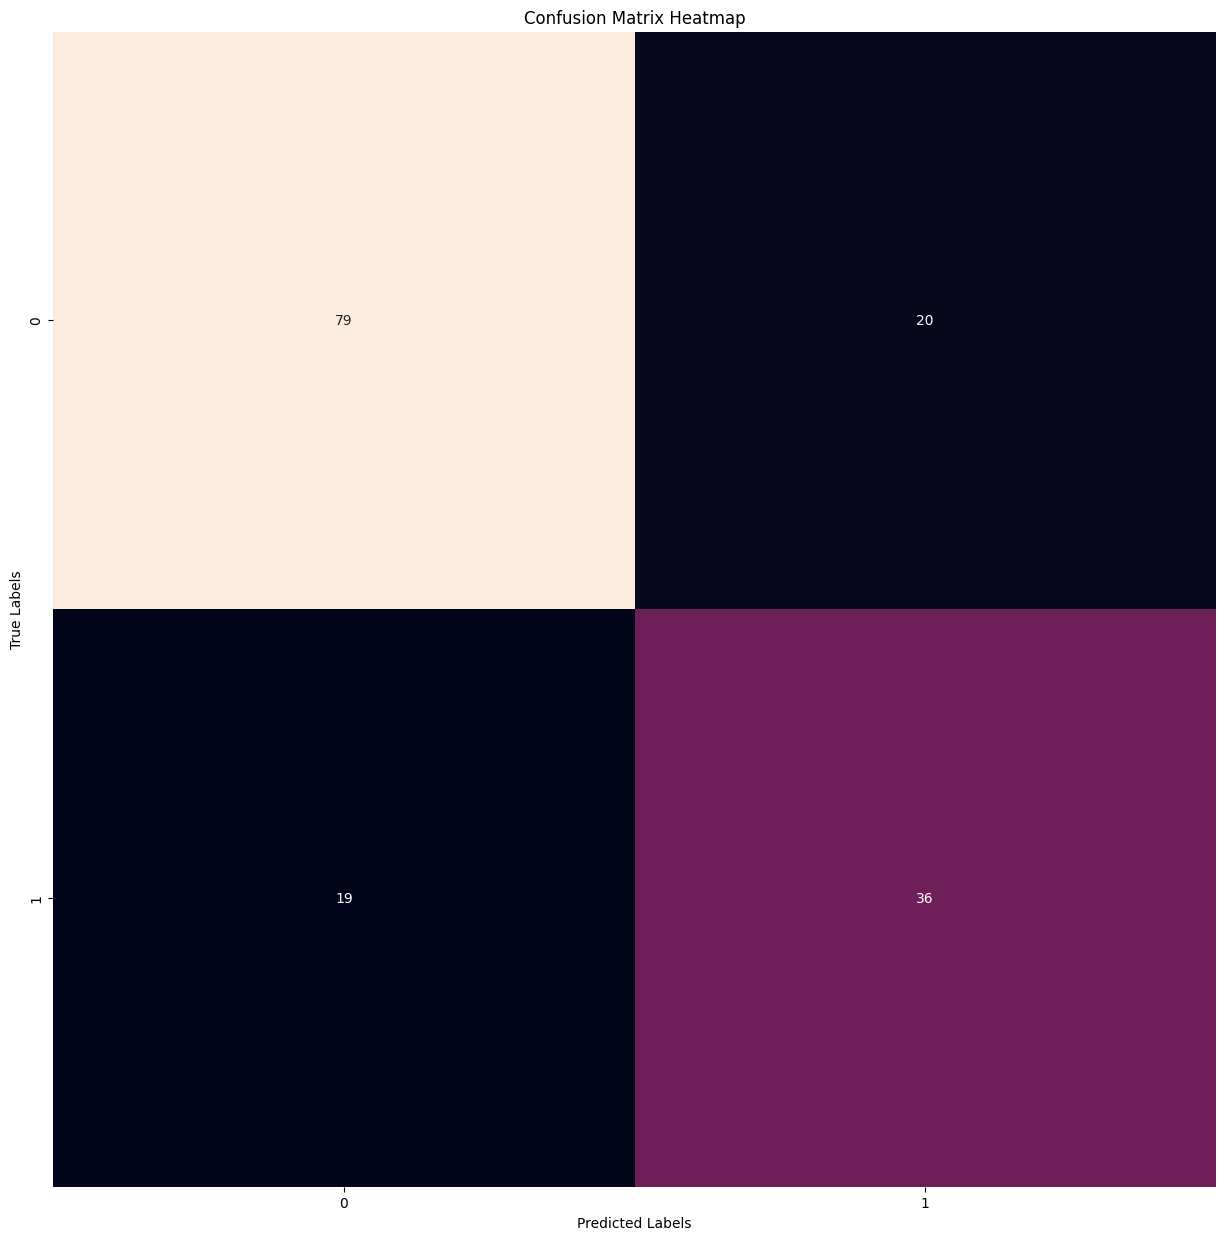

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
data = {
    'Pregnancies': [0, 1, 8, 1, 0, 10, 2, 5, 1, 1],
    'Glucose': [148, 85, 183, 89, 137, 101, 122, 121, 126, 93],
    'BloodPressure': [72, 66, 64, 66, 40, 76, 70, 72, 60, 70],
    'SkinThickness': [35, 29, 0, 23, 35, 48, 27, 23, 0, 31],
    'Insulin': [0, 0, 0, 94, 168, 180, 0, 112, 0, 0],
    'BMI': [33.6, 26.6, 23.3, 28.1, 43.1, 32.9, 36.8, 26.2, 30.1, 30.4],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288, 0.171, 0.34, 0.245, 0.349, 0.315],
    'Age': [50, 31, 32, 21, 33, 63, 27, 30, 47, 23]
}

# Create a DataFrame
random_df = pd.DataFrame(data)

In [ ]:
random_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,10,101,76,48,180,32.9,0.171,63
6,2,122,70,27,0,36.8,0.340,27
7,5,121,72,23,112,26.2,0.245,30
8,1,126,60,0,0,30.1,0.349,47
9,1,93,70,31,0,30.4,0.315,23


In [ ]:
random_transform = transformer.transform(random_df)

In [ ]:
random_predictions = mnb.predict(random_transform)
random_predictions

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
random_df['random_predictions'] = random_predictions

random_df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age" ,'random_predictions']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,random_predictions
0,0,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,10,101,76,48,180,32.9,0.171,63,0
6,2,122,70,27,0,36.8,0.340,27,0
7,5,121,72,23,112,26.2,0.245,30,0
8,1,126,60,0,0,30.1,0.349,47,1
9,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
random_predictions = model.predict(random_transform)
random_predictions

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
random_df['random_predictions'] = random_predictions

random_df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age" ,'random_predictions']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,random_predictions
0,0,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,10,101,76,48,180,32.9,0.171,63,0
6,2,122,70,27,0,36.8,0.340,27,0
7,5,121,72,23,112,26.2,0.245,30,0
8,1,126,60,0,0,30.1,0.349,47,0
9,1,93,70,31,0,30.4,0.315,23,0
